In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [2]:
# loading the data
data = pd.read_excel('data.xlsx')

In [3]:
# preview the data
data.head()

,SUBSCRIBER_ID,BNUM_OUT,BNUM_IN,CHURN,PROD_CNT_MACRO,REV_BUN_MAC,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,TOPUP_AMT,TOPUP_CNT,Segment
0,1,2.0,3.0,1,NaN,NaN,0.0,0.0,2.0,1.0,163,NaN,NaN,Segment 1
1,2,52.0,32.0,0,3.0,2.0,1.0,0.0,0.0,966.0,76,2.0,3.0,Segment 2
2,3,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,118,NaN,0.0,Segment 3
3,4,4.0,5.0,1,NaN,NaN,3.0,0.0,5.0,5.0,107,4.0,2.0,Segment 1
4,5,0.0,14.0,0,0.0,NaN,0.0,0.0,0.0,0.0,149,6.0,2.0,Segment 5


In [4]:
# examining the presence of missing values
total_missing = data.isna().sum().sort_values(ascending = False)
total_missing

REV_BUN_MAC             3977
PROD_CNT_MACRO          2825
TOPUP_AMT               2263
TOPUP_CNT               1909
REV_OUT                  508
BNUM_OUT                 488
BNUM_IN                  488
USAGE_OUT_INT_DUR        401
USAGE_OUT_OFFNET_DUR     401
USAGE_OUT_ONNET_DUR      401
Segment                    2
SUBSCRIBER_ID              0
CHURN                      0
LNE_TENURE                 0
dtype: int64

In [5]:
# deleting SUBSCRIBER_ID variable as it is not very useful and informative for creating predictive model
data = data.drop('SUBSCRIBER_ID', axis = 1)
data.columns

Index(['BNUM_OUT', 'BNUM_IN', 'CHURN', 'PROD_CNT_MACRO', 'REV_BUN_MAC',
       'REV_OUT', 'USAGE_OUT_INT_DUR', 'USAGE_OUT_OFFNET_DUR',
       'USAGE_OUT_ONNET_DUR', 'LNE_TENURE', 'TOPUP_AMT', 'TOPUP_CNT',
       'Segment'],
      dtype='object')

In [6]:
# handling missing values the same way as shown in Script and Logistical Refression Model scripts
data = data.drop(['REV_BUN_MAC','PROD_CNT_MACRO','TOPUP_AMT','TOPUP_CNT'], axis = 1)
data

,BNUM_OUT,BNUM_IN,CHURN,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,Segment
0,2.0,3.0,1,0.0,0.0,2.0,1.0,163,Segment 1
1,52.0,32.0,0,1.0,0.0,0.0,966.0,76,Segment 2
2,NaN,NaN,0,NaN,NaN,NaN,NaN,118,Segment 3
3,4.0,5.0,1,3.0,0.0,5.0,5.0,107,Segment 1
4,0.0,14.0,0,0.0,0.0,0.0,0.0,149,Segment 5
...,...,...,...,...,...,...,...,...,...
4995,1.0,0.0,1,0.0,0.0,0.0,1.0,137,Segment 1
4996,11.0,11.0,0,0.0,0.0,2.0,213.0,150,Segment 2
4997,2.0,9.0,0,0.0,0.0,0.0,188.0,134,Segment 5
4998,15.0,17.0,0,3.0,0.0,3.0,2.0,115,Segment 3


In [7]:
# filling missing values in Segment variable
most_frequent = data.Segment.mode()[0]
data.Segment = data.Segment.fillna(most_frequent)

In [8]:
# eliminating rows with missing values for columns USAGE_OUT_INT_DUR, USAGE_OUT_OFFNET_DUR, USAGE_OUT_ONNET_DUR
data = data.dropna(subset = ['USAGE_OUT_INT_DUR', 'USAGE_OUT_OFFNET_DUR','USAGE_OUT_ONNET_DUR'])

In [9]:
# capturing Segment variable
segment = data.Segment
segment

0       Segment 1
1       Segment 2
3       Segment 1
4       Segment 5
5       Segment 3
          ...    
4995    Segment 1
4996    Segment 2
4997    Segment 5
4998    Segment 3
4999    Segment 1
Name: Segment, Length: 4599, dtype: object

In [10]:
# applying shapiro test to see the distribution of variables
from scipy.stats import shapiro

columns_shapiro = ['REV_OUT','BNUM_OUT','BNUM_IN']
columns_shapiro
p_values = data[columns_shapiro].apply(lambda x: shapiro(x)[1])
p_values

REV_OUT     1.0
BNUM_OUT    1.0
BNUM_IN     1.0
dtype: float64

In [11]:
# filling missing values in variables REV_OUT, BNUM_OUT and BNUM_IN with their mean values (since they are normally distributed)
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
data_inputed = imp.fit_transform(data.drop('Segment',axis=1))

In [12]:
# checking if there are remaining missing values
column_names = data.drop('Segment',axis =1).columns
# column_names 
data_inputed = pd.DataFrame(data_inputed, columns = column_names)
data_inputed.isna().sum().sort_values(ascending = False)
data_inputed

,BNUM_OUT,BNUM_IN,CHURN,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE
0,2.0,3.0,1.0,0.0,0.0,2.0,1.0,163.0
1,52.0,32.0,0.0,1.0,0.0,0.0,966.0,76.0
2,4.0,5.0,1.0,3.0,0.0,5.0,5.0,107.0
3,0.0,14.0,0.0,0.0,0.0,0.0,0.0,149.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,139.0
...,...,...,...,...,...,...,...,...
4594,1.0,0.0,1.0,0.0,0.0,0.0,1.0,137.0
4595,11.0,11.0,0.0,0.0,0.0,2.0,213.0,150.0
4596,2.0,9.0,0.0,0.0,0.0,0.0,188.0,134.0
4597,15.0,17.0,0.0,3.0,0.0,3.0,2.0,115.0


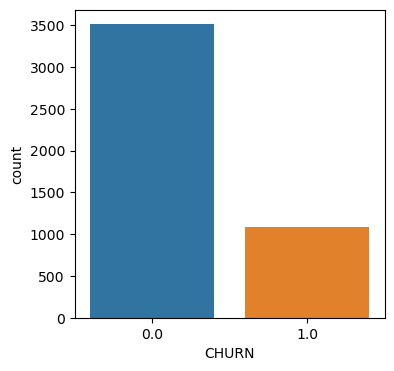

In [13]:
# checking the distribution of CHURN variable (how many customers have left the company)
plt.figure(figsize=(4,4))
ax = sn.countplot(x = 'CHURN', data = data_inputed)
# The dataset in not balanced

In [14]:
# encoding categorical variable Segment
segment = pd.get_dummies(segment)
segment = segment.astype(int)
segment

,Segment 1,Segment 2,Segment 3,Segment 5
0,1,0,0,0
1,0,1,0,0
3,1,0,0,0
4,0,0,0,1
5,0,0,1,0
...,...,...,...,...
4995,1,0,0,0
4996,0,1,0,0
4997,0,0,0,1
4998,0,0,1,0


In [15]:
# Input data
X = data_inputed.drop('CHURN', axis = 1)
segment.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)

X = pd.concat([X, segment], axis=1)
X
# X.isna().sum().sort_values(ascending = False)

,BNUM_OUT,BNUM_IN,REV_OUT,USAGE_OUT_INT_DUR,USAGE_OUT_OFFNET_DUR,USAGE_OUT_ONNET_DUR,LNE_TENURE,Segment 1,Segment 2,Segment 3,Segment 5
0,2.0,3.0,0.0,0.0,2.0,1.0,163.0,1,0,0,0
1,52.0,32.0,1.0,0.0,0.0,966.0,76.0,0,1,0,0
2,4.0,5.0,3.0,0.0,5.0,5.0,107.0,1,0,0,0
3,0.0,14.0,0.0,0.0,0.0,0.0,149.0,0,0,0,1
4,0.0,1.0,0.0,0.0,0.0,0.0,139.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4594,1.0,0.0,0.0,0.0,0.0,1.0,137.0,1,0,0,0
4595,11.0,11.0,0.0,0.0,2.0,213.0,150.0,0,1,0,0
4596,2.0,9.0,0.0,0.0,0.0,188.0,134.0,0,0,0,1
4597,15.0,17.0,3.0,0.0,3.0,2.0,115.0,0,0,1,0


In [16]:
# target variable CHURN
y = data['CHURN']
y
# y.isna().sum()

0       1
1       0
3       1
4       0
5       0
       ..
4995    1
4996    0
4997    0
4998    0
4999    1
Name: CHURN, Length: 4599, dtype: int64

In [17]:
# splitting data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 0, stratify = y)

In [18]:
# creating and fitting Gradian Boostint Classifier model
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.1, random_state=0)

# fitting the model to the data
gb_model = gb_model.fit(X_train, y_train)

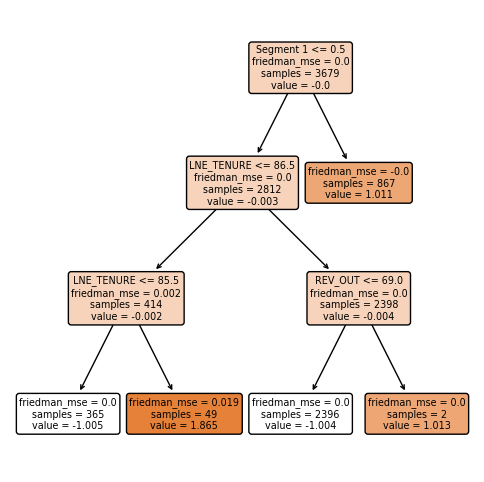

In [26]:
# plotting the tree
from sklearn.tree import plot_tree
# Get the tree number 42
sub_tree = gb_model.estimators_[42, 0]

plt.figure(figsize=(6, 6))
plot_tree(sub_tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [ ]:
# generating predictions with created model
y_pred = gb_model.predict(X_test)
y_pred[:10]

In [ ]:
# checking accuracy of the model
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred) * 100

print('Model accuracy score: {0:0.4f}'.format(acc_score))

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm)

plt.figure(figsize=(2,2))
cm_display.plot()

In [ ]:
# F1 score, measuring harmonic mean between Precision and Recall
from sklearn.metrics import f1_score as f1
f1(y_test, y_pred) *100

In [ ]:
plt.figure(figsize=(4,4))
# Area under the curve
from sklearn import metrics

# Making predictions on the test dataset
y_scores = gb_model.predict_proba(X_test)[:, 1]

# Calculating the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_scores)

# Calculating the AUC
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.4f})")

plt.legend(loc='lower right')
plt.text(0.6, 0.3, f'AUC = {roc_auc:.4f}', fontsize=12)
plt.show()

In [ ]:
# Feature importance
feature_importance = pd.DataFrame(gb_model.feature_importances_,index = X.columns, columns = ['Feature score'])

feature_importance['Feature score'] = feature_importance['Feature score'].apply(lambda x: f'{x:.8f}')

# sorting the values in descending order
feature_importance.sort_values(by = 'Feature score', ascending = False, inplace = True)
feature_importance